# TP 1 - Parte 2

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.datasets import load_iris
import xgboost as xgb
from yellowbrick.classifier import ConfusionMatrix
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [4]:
data = pd.read_csv('../data/loan_data.csv')
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


# Procesamiento

In [5]:
#1. Datos con los cambios realizados en la primera parte
data = data[data['person_age'] <= 39]
data = data[data['person_income'] <= 168653]
data = data[data['person_emp_exp'] <= 18]
data = data[data['loan_amnt'] <= 23050]
data = data[data['loan_percent_income'] <= 0.37]
data = data[data['cb_person_cred_hist_length'] <= 15]
data = data[(data['credit_score'] >= 503) & (data['credit_score'] <= 773)]
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1
11,21.0,female,Associate,13113.0,0,OWN,4500.0,HOMEIMPROVEMENT,8.63,0.34,2.0,651,No,1
19,24.0,female,Master,14283.0,1,MORTGAGE,1750.0,EDUCATION,10.99,0.12,2.0,679,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [6]:
#2. para las variables continuas mostramos un listado de Q1 y Q3. Determinamos si hay escalas muy dispares entre las variables
continuas_cols = ["person_income", "loan_amnt", "loan_int_rate", "loan_percent_income"]
data_continuas = data[continuas_cols].quantile([0.25, 0.75]).transpose()
data_continuas.columns = ["Q1", "Q3"]
data_continuas 

,Q1,Q3
person_income,45616.00,87819.50
loan_amnt,4889.50,12000.00
loan_int_rate,8.49,12.98
loan_percent_income,0.07,0.18


Hay **escalas muy dispares** entre las variables.

In [7]:
#3. Determinamos si loan_status es una variable balanceada o desbalanceada
loan_status_counts = data['loan_status'].value_counts()
loan_status_percentages = data['loan_status'].value_counts(normalize=True) * 100
loan_status_summary = pd.DataFrame({'Count': loan_status_counts, 'Percentage': loan_status_percentages.round(2)}).reset_index()
loan_status_summary

,loan_status,Count,Percentage
0,0,29489,78.59
1,1,8034,21.41


La variable **loan_status** está desbalanceada, ya que:
- La clase 0 representa el 77.78% de las observaciones.
- La clase 1 representa solo el 22.22%.

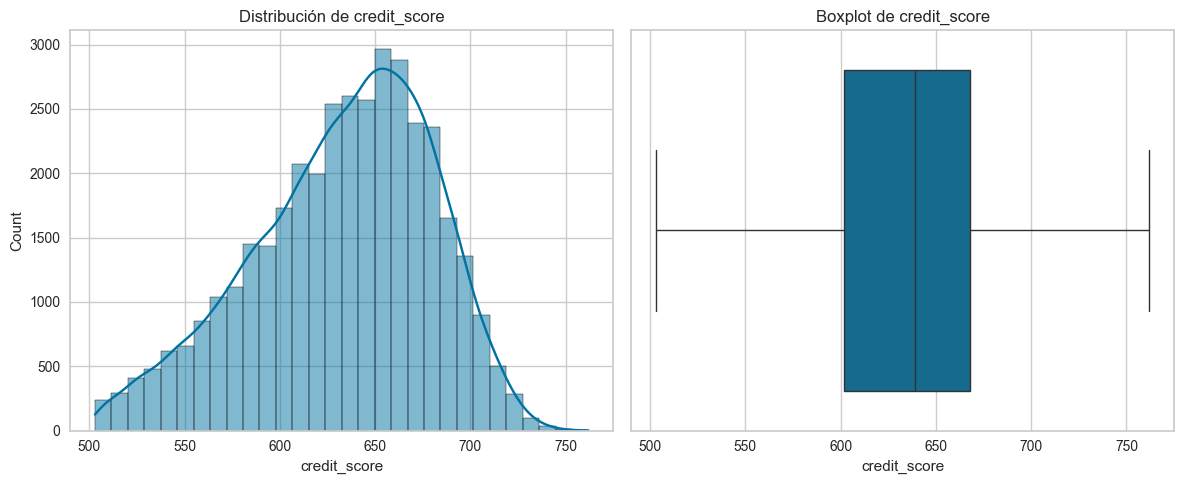

In [8]:
#4. Determinamos si credit_score tiene valores anómalos o muchos valores extremos. En tal caso de ser muchos, vamos a eliminarlos.
plt.figure(figsize=(12, 5))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(data['credit_score'], bins=30, kde=True)
plt.title("Distribución de credit_score")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=data['credit_score'])
plt.title("Boxplot de credit_score")

plt.tight_layout()
plt.show()

In [9]:
Q1 = data['credit_score'].quantile(0.25)
Q3 = data['credit_score'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['credit_score'] < lower_bound) | (data['credit_score'] > upper_bound)]
percentage_outliers = (len(outliers) / len(data)) * 100

print(f"Cantidad de valores extremos: {len(outliers)}")
print(f"Porcentaje de outliers: {percentage_outliers:.2f}%")

Cantidad de valores extremos: 0
Porcentaje de outliers: 0.00%


No se detectaron valores extremos.  
Esto se debe a que previamente, durante la etapa de limpieza, ya se filtraron los valores fuera del rango [503, 773].  
Por lo tanto, no fue necesario eliminar observaciones adicionales en este paso.

In [10]:
#5. Separamos el dataset en componentes:
#a.Separamos la columna de loan_status y la llamamos y1.
y1 = data['loan_status']
#b.Separamos la columna de credit_score y la llamamos y2.
y2 = data['credit_score']
#c.Separamos todas las columnas que no sean loan_status y credit_score y las llamamos X.
X = data.drop(columns=['loan_status', 'credit_score'])
X

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,previous_loan_defaults_on_file
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,Yes
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,No
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,No
11,21.0,female,Associate,13113.0,0,OWN,4500.0,HOMEIMPROVEMENT,8.63,0.34,2.0,No
19,24.0,female,Master,14283.0,1,MORTGAGE,1750.0,EDUCATION,10.99,0.12,2.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,No
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,No
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,No
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,No


# Aprendizaje no supervisado


## Clustering

In [11]:
#1. Entrenamos un modelo de KMeans sobre X.
#a. Calculamos el estadístico de Hopkins para determinar si la clusterización está justificada.
def Hopkins(X, m=None, random_state=0):
    """
    Hopkins en [0,1]; ~0.5 aleatorio/uniforme, ->1 fuerte clusterización.
    """
    rng = np.random.default_rng(random_state)
    X = np.asarray(X)
    n, d = X.shape
    if n < 2:
        raise ValueError("Need at least 2 samples")
    if m is None:
        m = max(1, int(0.1 * n))
    m = min(m, n-1)  # por w_i (excluir el propio punto)

    # Escalamos a [0,1]^d para definir el dominio uniforme
    from sklearn.preprocessing import MinMaxScaler
    Xs = MinMaxScaler().fit_transform(X)

    # Vecinos sobre datos reales
    nbrs = NearestNeighbors(n_neighbors=2).fit(Xs)

    # u_i: puntos uniformes en [0,1]^d
    U = rng.uniform(0.0, 1.0, size=(m, d))
    u = nbrs.kneighbors(U, n_neighbors=1, return_distance=True)[0].ravel()

    # w_i: puntos reales
    idx = rng.choice(n, size=m, replace=False)
    w = nbrs.kneighbors(Xs[idx], n_neighbors=2, return_distance=True)[0][:, 1]

    return float(u.sum() / (u.sum() + w.sum()))

# Usamos solo las columnas numéricas
X_num = X.select_dtypes(include='number')

# Escalamos a [0,1] para usar Hopkins
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X_num)

# Calcular Hopkins
hopkins_score = Hopkins(X_minmax, random_state=42)
print(f"Hopkins score: {hopkins_score:.4f}")

Hopkins score: 0.8343


Con un valor de **0.83**, los datos presentan tendencia al agrupamiento, lo que justifica aplicar un algoritmo de clustering como KMeans.


In [12]:
#b. Decidimos si conviene normalizar las variables de entrada.
columns = ["person_income", "loan_amnt", "loan_percent_income", "loan_int_rate"]
data[columns].agg(["min", "max"])

,person_income,loan_amnt,loan_percent_income,loan_int_rate
min,8000.0,500.0,0.01,5.42
max,168633.0,23000.0,0.37,20.00


Las variables presentan escalas muy diferentes. Por este motivo, conviene normalizar antes de aplicar KMeans, para que todas las variables tengan el mismo peso en el cálculo de distancias.

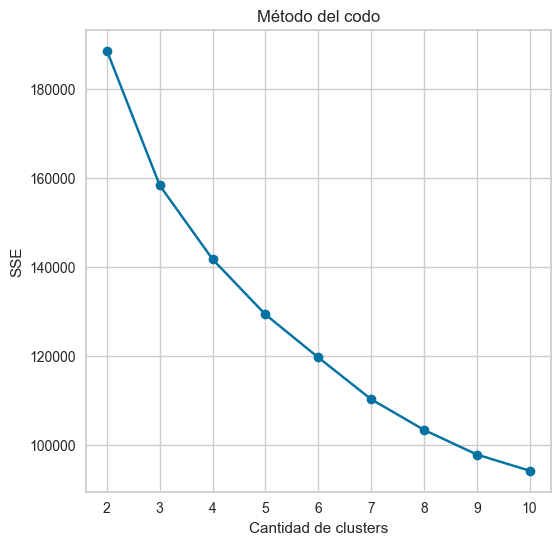

In [13]:
#c. Hallamos la cantidad de clusters adecuada mediante inertia.
standar_scaler = StandardScaler()
X_scaled = standar_scaler.fit_transform(X_num)

sse = []
list_k = list(range(2, 11)) 

for k in list_k:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)  # variables numéricas normalizadas
    sse.append(km.inertia_)

plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel('Cantidad de clusters')
plt.ylabel('SSE')
plt.title('Método del codo')
plt.show()

En el gráfico del método del codo no se observa un quiebre muy marcado, pero la pendiente comienza a suavizarse a partir de k = 4.  
Por lo tanto, se considera que **k = 4** es la cantidad de clusters más adecuada para este dataset.

In [14]:
#d. Para la cantidad óptima analizar la calidad de los clusters con silhouette.
list_k = list(range(2, 7))
for n_clusters in list_k:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    labels = clusterer.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"For n_clusters = {n_clusters}, silhouette score = {score:.4f}")

For n_clusters = 2, silhouette score = 0.2786
For n_clusters = 3, silhouette score = 0.2255
For n_clusters = 4, silhouette score = 0.2118
For n_clusters = 5, silhouette score = 0.2019
For n_clusters = 6, silhouette score = 0.1775


Se calculó el coeficiente de silhouette para distintos valores de clusters.  
El mayor valor se obtuvo en **k=2**, lo que indica que esta configuración logra la mejor separación entre los clusters y que los puntos dentro de cada grupo están más próximos entre sí.

In [15]:
#e. Almacenamos el cluster asignado para cada fila como features a usar para las tareas de aprendizaje supervisado.
k_optimo = 2
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
labels = kmeans.fit_predict(X_scaled)
data["cluster"] = labels
data["cluster"].value_counts()

cluster
1    23684
0    13839
Name: count, dtype: int64

## Reducción de dimensiones

/var/folders/mp/w17xt60d6qs26y8wzmwd7_2m0000gq/T/ipykernel_47854/2799346350.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


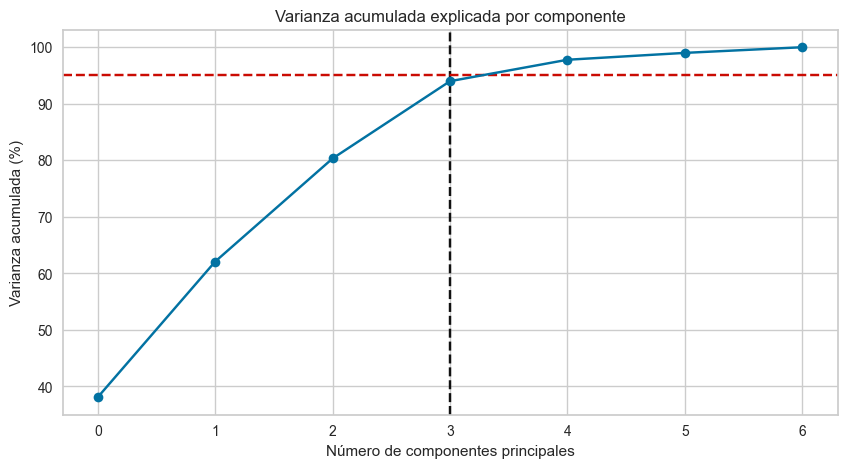

In [43]:
#2. Entrenamos un modelo con PCA sobre X. 
#a. Decidimos si conviene normalizar las variables de entrada.
pca = PCA()
pca.fit(X_scaled)

var_cumu = np.cumsum(pca.explained_variance_ratio_) * 100

k = 3
plt.figure(figsize=(10,5))
plt.title('Varianza acumulada explicada por componente')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza acumulada (%)')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
plt.plot(var_cumu, marker='o')
plt.legend()
plt.show()

El gráfico de varianza acumulada muestra que con **3 componentes principales** se alcanza más del **95% de la varianza explicada**.  

Esto confirma que **sí conviene normalizar las variables de entrada antes de aplicar PCA**. De esta forma, se evita que las variables con mayor escala dominen el análisis y se logra una reducción de dimensiones representativa.

In [44]:
#b. Hallamos la cantidad de componentes adecuada.
pca_auto = PCA(n_components=0.95)
X_pca_auto = pca_auto.fit_transform(X_scaled)
print("Cantidad de componentes elegidos automáticamente:", pca_auto.n_components_)
print("Forma del dataset reducido:", X_pca_auto.shape)


Cantidad de componentes elegidos automáticamente: 5
Forma del dataset reducido: (37523, 5)


El número de componentes se puede decidir de dos formas:  
1. **Método gráfico**: al observar la curva de varianza acumulada, se aprecia que a partir de 3 componentes se alcanza aproximadamente el 95% de la varianza explicada.  
2. **Método automático**: utilizando `PCA(n_components=0.95)`, se obtuvo **5 componentes** como el número necesario para superar el 95% de varianza de forma exacta.

En conclusión, aunque visualmente podría elegirse k=3, el cálculo preciso indica que con **5 componentes principales** se garantiza retener al menos el 95% de la información del dataset.

In [45]:
#c. Informamos la cantidad de varianza acumulada explicada por las componentes seleccionadas.
explained_var = pca_auto.explained_variance_ratio_ * 100
cumulative_var = explained_var.cumsum()

print("Varianza explicada por cada componente (%):")
for i, var in enumerate(explained_var, start=1):
    print(f"Componente {i}: {var:.2f}%")

print(f"\nVarianza acumulada con {pca_auto.n_components_} componentes: {cumulative_var[-1]:.2f}%")

Varianza explicada por cada componente (%):
Componente 1: 38.08%
Componente 2: 24.00%
Componente 3: 18.24%
Componente 4: 13.67%
Componente 5: 3.79%

Varianza acumulada con 5 componentes: 97.78%


In [46]:
#d. Almacenamos las componentes como features a usar para las tareas de aprendizaje supervisado.
pca_final = PCA(n_components=pca_auto.n_components_)
X_pca = pca_final.fit_transform(X_scaled)
pca_columns = [f"PCA{i+1}" for i in range(pca_final.n_components_)]
X_pca_df = pd.DataFrame(X_pca, columns=pca_columns)
data_pca = pd.concat([data.reset_index(drop=True), X_pca_df], axis=1)
data_pca


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,cluster,PCA1,PCA2,PCA3,PCA4,PCA5
0,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0,1,-2.234413,-1.349012,-1.804767,0.075246,-0.039916
1,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1,1,-2.266783,-0.420069,-1.773341,-1.547422,-0.040961
2,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1,1,-2.039644,-0.546960,-2.145507,1.096363,0.228948
3,21.0,female,Associate,13113.0,0,OWN,4500.0,HOMEIMPROVEMENT,8.63,0.34,2.0,651,No,1,1,-2.289522,1.344117,-2.172737,-1.505154,-0.053495
4,24.0,female,Master,14283.0,1,MORTGAGE,1750.0,EDUCATION,10.99,0.12,2.0,679,No,1,1,-1.663640,-0.900047,-1.855790,-0.101046,-0.335061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37518,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1,1,-0.162890,2.910345,-0.851434,0.860090,-0.881325
37519,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1,0,4.379439,0.327884,-0.716993,0.858925,-0.638034
37520,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1,0,2.150388,-1.602324,-0.733325,-0.115390,0.634895
37521,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1,1,0.322802,2.818471,-1.590815,-0.125558,0.101579


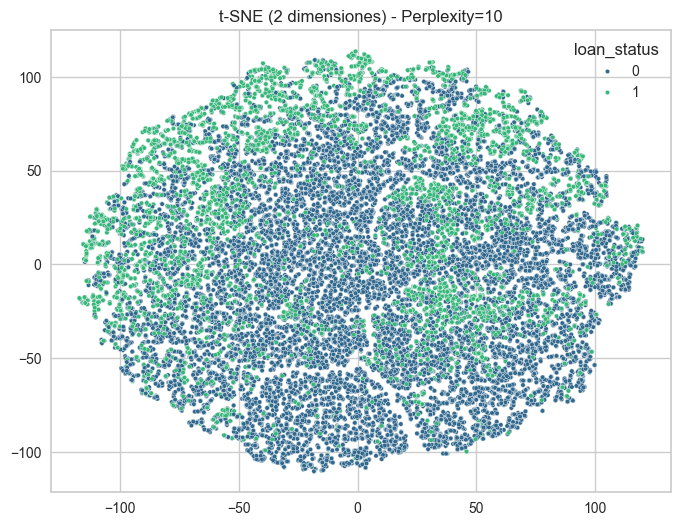

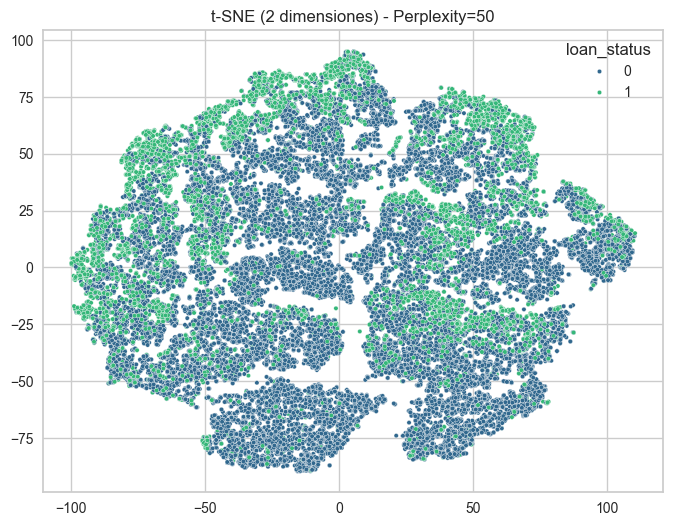

In [42]:
#3. Entrenamos un modelo de t-SNE sobre X que proyecte a 2 dimensiones.
#a. Probamos por lo menos dos valores de perplexity.

# t-SNE con perplexity=10
X_tsne_10 = TSNE(n_components=2, perplexity=10).fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne_10[:, 0], y=X_tsne_10[:, 1], hue=y1, palette="viridis", s=10)
plt.title("t-SNE (2 dimensiones) - Perplexity=10")
plt.show()

# t-SNE con perplexity=50
X_tsne_50 = TSNE(n_components=2, perplexity=50).fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne_50[:, 0], y=X_tsne_50[:, 1], hue=y1, palette="viridis", s=10)
plt.title("t-SNE (2 dimensiones) - Perplexity=50")
plt.show()

b. Interpretamos los resultados

- Perplexity = 10
La visualización muestra un agrupamiento algo circular y denso, sin bordes definidos.
No hay una separación clara entre las clases (loan_status 0 y 1). Ambas clases están mezcladas en todo el espacio.
Esto puede indicar que con esta perplexity, el modelo capturó muy bien las relaciones locales, pero no logró diferenciar globalmente las clases.

- Perplexity = 50
El mapa tiene más forma y dispersión, con ciertos subgrupos y estructuras internas.
Aunque sigue habiendo mezcla entre las clases, comienzan a visualizarse algunas zonas con predominancia de una clase sobre otra.
Esto sugiere que el modelo captura mejor las relaciones globales entre los puntos al usar una perplexity más alta.

c. Comparamos lo obtenido con KMeans.
i. ¿Es muy distinto? Si, lo obtenido con t-SNE no es equivalente a lo obtenido con KMeans, porque ambos algoritmos resuelven problemas distintos. 
ii. ¿Por qué podría dar distinto? t-SNE ayuda a visualizar relaciones locales, mientras que KMeans asigna pertenencia a grupos en función de la **distancia euclidiana**.
Por lo tanto, t-SNE puede mostrar agrupamientos que no coinciden con los clusters lineales detectados por KMeans.